# Maya Sosa, HW10, 11/1/21

Problem 1:

In [2]:
import numpy as np

Problem 2:

In [44]:
class holiday_frenzy:
    def __init__(self, a, b, c, number_of_gifts, wrap_paper_available): 
        self.a = a
        self.b = b
        self.c = c
        self.number_of_gifts = number_of_gifts
        self.wrap_paper_available = wrap_paper_available
        
    def surface_area(self):
        """Returns surface area of box"""
        surface_area = (2*self.a*self.b) + (2*self.a*self.c) + (2*self.b*self.c)
        return surface_area
    
    def volume(self):
        """Returns volume of box"""
        volume = self.a * self.b * self.c
        return volume
        
    def enough_paper(self, surface_area):
        """Checks if you have enough wrapping paper"""
        wrap_paper_needed = surface_area
        if wrap_paper_needed <= self.wrap_paper_available:
            enough = 'You do have enough wrapping paper to wrap your box. '
        else:
            enough = 'You do not have enough wrapping paper to fit your box. '  
        return enough
        
        
    def fits(self, volume):
        """Checks if your box can fit all the presents (assuming average volume of a gift is 25 inches^3)"""
        total_volume_gifts = 25 * self.number_of_gifts
        if volume >= total_volume_gifts:
            fits = 'Your gifts will fit in your box.'
        else:
            fits = 'Your gifts will not fit in your box'
        return fits
            
        
    def prints_gift(self, enough, fits):
        "Prints an informative statement letting you know if you have enough wrapping paper to wrap your box and if your gifts fit in the box."
        return enough + fits

In [45]:
box1 = holiday_frenzy(10, 10, 10, 15, 800)
box2 = holiday_frenzy(10, 10, 10, 55, 1000)
box3 = holiday_frenzy(100, 20, 10, 55, 300)

box_list = [box1, box2, box3]

for i in box_list:
    x = i.surface_area()
    z = i.enough_paper(x)
    y = i.volume()
    f = i.fits(y)
    print ('For box', box_list.index(i) + 1,':',  i.prints_gift(z, f))

For box 1 : You do have enough wrapping paper to wrap your box. Your gifts will fit in your box.
For box 2 : You do have enough wrapping paper to wrap your box. Your gifts will not fit in your box
For box 3 : You do not have enough wrapping paper to fit your box. Your gifts will fit in your box.


Problem 3:

In [3]:
def piston(vf, p0, v0, t0, gamma):
    """Uses given values to calculate the pressures for the piston volumes in V, using the adiabatic law. 
    Then, calculates the temperatures using the ideal gas law.
     Inputs: An array N of given volumes, initial pressure(atm); volume(liter); temp(kelvin) values, and γ (gamma)
     Outputs: An (N, 3) array containing (P; V; T) values."""
    
    #Calculations
    pf_list = []
    tf_list = []
    
    for i in vf:
        c1 = (p0) * (v0**gamma) #Adiabatic law (finding pressures)
        pf = (c1) / (i**gamma)
        pf_list.append(pf)
        c2 = ((p0)*(v0)) / t0 #Ideal gas law (finding temperatures)
        tf = ((pf)*(i)) / c2
        tf_list.append(tf)
        
    
    #Putting the values together in array
    final_list = [] 
    
    for j in range(len(vf)):
        sets = ["{:.3f}".format(vf[j]) , "{:.3f}".format(pf_list[j]), "{:.3f}".format(tf_list[j])]
        final_list.append(sets)
        
        
    return np.array(final_list)

In [4]:
vf = np.linspace(1, 0.1, 40)

z = piston(vf, 1, 1, 300, 1.4)

print('Final values given in seperate lists of [Volume, Pressure, Temp]: ',   z)
print(type(z))
print(z.shape) #Correct shape and type

Final values given in seperate lists of [Volume, Pressure, Temp]:  [['1.000' '1.000' '300.000']
 ['0.977' '1.033' '302.815']
 ['0.954' '1.068' '305.724']
 ['0.931' '1.106' '308.734']
 ['0.908' '1.145' '311.850']
 ['0.885' '1.187' '315.079']
 ['0.862' '1.232' '318.428']
 ['0.838' '1.280' '321.905']
 ['0.815' '1.331' '325.519']
 ['0.792' '1.385' '329.279']
 ['0.769' '1.444' '333.195']
 ['0.746' '1.507' '337.279']
 ['0.723' '1.574' '341.545']
 ['0.700' '1.648' '346.005']
 ['0.677' '1.727' '350.676']
 ['0.654' '1.813' '355.575']
 ['0.631' '1.906' '360.722']
 ['0.608' '2.008' '366.140']
 ['0.585' '2.120' '371.855']
 ['0.562' '2.243' '377.894']
 ['0.538' '2.379' '384.290']
 ['0.515' '2.529' '391.083']
 ['0.492' '2.697' '398.315']
 ['0.469' '2.884' '406.038']
 ['0.446' '3.095' '414.312']
 ['0.423' '3.334' '423.208']
 ['0.400' '3.607' '432.810']
 ['0.377' '3.920' '443.221']
 ['0.354' '4.282' '454.564']
 ['0.331' '4.706' '466.994']
 ['0.308' '5.208' '480.701']
 ['0.285' '5.808' '495.927']
 ['0.

In [6]:
%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

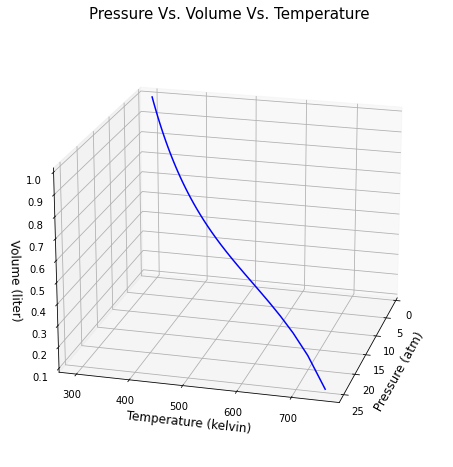

In [7]:
#Plotting Curve

fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection ='3d')


z = np.linspace(1, 0.1, 40)
x = 1 / (z**1.4)
y = 300 * x * z

ax.plot3D(x, y, z, 'blue')

ax.set_title("Pressure Vs. Volume Vs. Temperature", size = 15)

ax.set_xlabel( ' Pressure (atm) ' , size = 12 )
ax.set_ylabel( ' Temperature (kelvin) ' , size = 12 )
ax.set_zlabel( ' Volume (liter) ' , size = 12 )

ax.view_init(20,15)

plt.savefig( 'HW10_Maya_Problem4b_Graph.png', format = 'png')

Problem 4:

Text(0.5, 1.0, 'Problem 4 Part A')

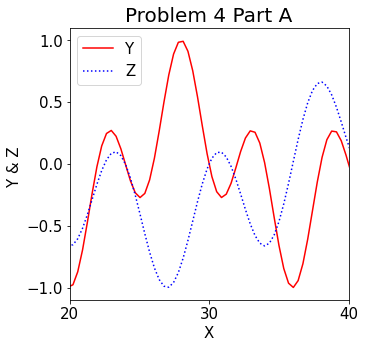

In [50]:
#Part a: Plotting
xline = np.linspace(12, 46, 100)
num = np.pi * xline
yline = np.sin(num/8) * np.cos(num/4)
zline = np.cos(num/9) * np.sin(num/6)

plt.figure( figsize = (5, 5))
plt.plot( xline, yline, color='red', label = 'Y') 
plt.plot( xline, zline, color='blue', linestyle=':', label = 'Z' ) 

plt.xlabel( 'X' , fontsize = 15)
plt.ylabel( 'Y & Z ' , fontsize = 15 )

plt.xlim(20, 40)

plt.yticks( np.linspace( -1, 1, 5 ) ,fontsize = 15 ) 
plt.xticks( np.linspace( 20, 40, 3 ) ,fontsize = 15 )

plt.legend( fontsize = 15 )

plt.title( 'Problem 4 Part A', fontsize = 20 )

In [51]:
#Part b: Scanning for where both y and z are positive and printing elements of x at indexes found 
i = 0
while i < len(yline):
    if yline[i] > 0 and zline[i]>0:
        print("{:.3f}".format(xline[i]))
    i = i+1

12.000
13.717
16.121
16.465
16.808
17.152
17.495
17.838
22.646
22.990
23.333
23.677
38.101
38.444
38.788
39.131
39.475
39.818
42.222
42.566
42.909
43.253
43.596
43.939
44.283
44.626
44.970
45.313
45.657
46.000


In [52]:
#Part c: Making arrays of zeros
data = np.zeros((len(xline), len(yline)))
data2 = np.zeros((len(xline), len(yline)))

#Part d: Populating arrays
for i in range(len(data)):
    for j in range(len(data2)):
        data[i,j] = yline[i] * zline[j]
        data2[i,j] = yline[i] / zline[j]
print(data)

[[ 1.22464680e-16 -7.02610605e-02 -9.85576643e-02 ...  9.80701785e-01
   9.16870290e-01  8.13797681e-01]
 [ 1.16964767e-16 -6.71056227e-02 -9.41314206e-02 ...  9.36658279e-01
   8.75693468e-01  7.77249870e-01]
 [ 1.01273463e-16 -5.81031277e-02 -8.15033038e-02 ...  8.11001722e-01
   7.58215591e-01  6.72978607e-01]
 ...
 [ 5.47271671e-17 -3.13983493e-02 -4.40435705e-02 ...  4.38257222e-01
   4.09732125e-01  3.63670911e-01]
 [ 2.59685977e-17 -1.48988363e-02 -2.08991224e-02 ...  2.07957512e-01
   1.94422063e-01  1.72565548e-01]
 [ 2.75781082e-31 -1.58222528e-16 -2.21944314e-16 ...  2.20846533e-15
   2.06472169e-15  1.83261007e-15]]


In [53]:
#Part e: Printing specific values
print(zline[np.where(yline>0) and np.where(yline<0.4)])
print(data[np.where(yline>0) and np.where(xline<0.2) and np.where(-0.16<zline) and np.where(zline<0)]) 

[ 0.05928302  0.17139144  0.29537026  0.41813732  0.5266283   0.60896898
  0.65554178  0.65985135  0.61911206  0.53450496  0.41108132  0.25732122
  0.0843866  -0.09486466 -0.26701592 -0.41927858 -0.54062314 -0.62275324
 -0.6608363  -0.6539254  -0.60503491 -0.52086312 -0.41118669 -0.28798086
 -0.16434401 -0.05332222  0.03326097  0.08586564  0.09809248  0.06725949
 -0.00535324 -0.11461239 -0.25198417 -0.40629085 -0.56470342 -0.71388196
 -0.84116213 -0.93568192 -0.16041503 -0.04010444  0.04621646  0.09214569
  0.09501252  0.05611048 -0.01942356 -0.1230733  -0.24370869 -0.36858495
 -0.48448597 -0.57890998 -0.64119195 -0.66346241 -0.64135739 -0.57441599
 -0.46613022 -0.32364258 -0.15711829  0.02115182  0.19783789  0.35975019
  0.4950058   0.59407886  0.65064066  0.66211492  0.62989858  0.55922856
  0.45870643  0.33952324  0.21445387  0.09671037 -0.0012433  -0.06880953
 -0.09820854 -0.08517827 -0.02936027  0.06566295  0.19268222  0.91687029
  0.81379768]
[[ 1.16964767e-16 -6.71056227e-02 -9.

In [54]:
#Part f: Transposing data
datatr = np.transpose(data)

print(datatr)

[[ 1.22464680e-16  1.16964767e-16  1.01273463e-16 ...  5.47271671e-17
   2.59685977e-17  2.75781082e-31]
 [-7.02610605e-02 -6.71056227e-02 -5.81031277e-02 ... -3.13983493e-02
  -1.48988363e-02 -1.58222528e-16]
 [-9.85576643e-02 -9.41314206e-02 -8.15033038e-02 ... -4.40435705e-02
  -2.08991224e-02 -2.21944314e-16]
 ...
 [ 9.80701785e-01  9.36658279e-01  8.11001722e-01 ...  4.38257222e-01
   2.07957512e-01  2.20846533e-15]
 [ 9.16870290e-01  8.75693468e-01  7.58215591e-01 ...  4.09732125e-01
   1.94422063e-01  2.06472169e-15]
 [ 8.13797681e-01  7.77249870e-01  6.72978607e-01 ...  3.63670911e-01
   1.72565548e-01  1.83261007e-15]]


Text(0.5, 1.0, 'Problem 4 Part G')

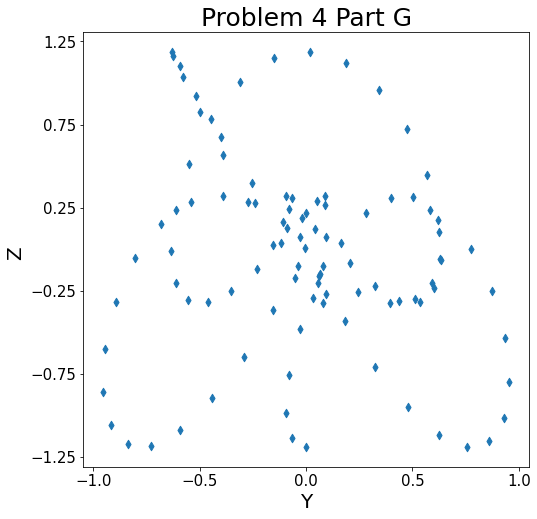

In [56]:
#Part g: Plotting data
xline2 = datatr[:, 1]
yline2 = data2[:, 41]

plt.figure( figsize = ( 8, 8 ) )

plt.scatter( xline2, yline2, marker = 'd' )

plt.xlabel( 'Y', fontsize = 20 )
plt.ylabel( 'Z ', fontsize = 20 )

plt.yticks( np.linspace( -1.25, 1.25, 6 ) ,fontsize = 15 ) 
plt.xticks( np.linspace( -1, 1, 5 ) ,fontsize = 15 )

plt.title( 'Problem 4 Part G', fontsize = 25 )


## Done!